## Introduction

HealthStats provides key health, nutrition and population statistics gathered from a variety of international sources. Themes include population dynamics, nutrition, reproductive health, health financing, medical resources and usage, immunization, infectious diseases, HIV/AIDS, DALY, population projections and lending. HealthStats also includes health, nutrition and population statistics by wealth quintiles.
]
This dataset includes 345 indicators, such as immunization rates, malnutrition prevalence, and vitamin A supplementation rates across 263 countries around the world. Data was collected on a yearly basis from 1960-2016. [Link is here](https://data.world/data-society/global-health-nutrition-data)

## Inspect the data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [2]:
df = pd.read_csv('global health nutrition.csv')

In [3]:
df.info() # check the information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89010 entries, 0 to 89009
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    89010 non-null  object 
 1   Country Code    89010 non-null  object 
 2   Indicator Name  89010 non-null  object 
 3   Indicator Code  89010 non-null  object 
 4   1960            35482 non-null  float64
 5   1961            35325 non-null  float64
 6   1962            35889 non-null  float64
 7   1963            35452 non-null  float64
 8   1964            35483 non-null  float64
 9   1965            35603 non-null  float64
 10  1966            35538 non-null  float64
 11  1967            36022 non-null  float64
 12  1968            35577 non-null  float64
 13  1969            35630 non-null  float64
 14  1970            36910 non-null  float64
 15  1971            37578 non-null  float64
 16  1972            38015 non-null  float64
 17  1973            37542 non-null 

In [4]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
0,Arab World,ARB,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,133.555013,134.159119,134.857912,134.504576,134.105211,133.569626,...,49.999851,49.887046,49.781207,49.672975,49.536047,49.383745,48.796558,48.196418,NaN,NaN
3,Arab World,ARB,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.iloc[:, :-1] #last column contains 0 non-null values so I removed it from the dataset

In [6]:
df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,3.548200e+04,3.532500e+04,3.588900e+04,3.545200e+04,3.548300e+04,3.560300e+04,3.553800e+04,3.602200e+04,3.557700e+04,3.563000e+04,...,5.439800e+04,5.425500e+04,5.387800e+04,5.443700e+04,5.709900e+04,5.492200e+04,5.492700e+04,5.292400e+04,5.219900e+04,4.306800e+04
mean,4.398856e+06,4.477329e+06,4.483279e+06,4.634875e+06,4.727806e+06,4.810557e+06,4.923225e+06,4.958680e+06,5.126162e+06,5.229267e+06,...,9.632233e+07,1.066701e+08,1.178440e+08,1.194416e+08,1.202183e+08,1.354606e+08,1.381746e+08,1.470674e+08,1.534580e+08,9.105685e+06
std,4.948245e+07,5.013205e+07,5.054473e+07,5.192122e+07,5.297849e+07,5.401988e+07,5.526006e+07,5.607026e+07,5.763263e+07,5.887277e+07,...,9.506925e+09,1.017662e+10,1.077350e+10,1.114136e+10,1.132855e+10,1.212198e+10,1.255757e+10,1.312843e+10,1.388442e+10,1.112609e+08
min,-2.374024e+00,-2.498824e+00,-3.826648e+06,-3.206682e+00,-3.078607e+00,-2.978527e+00,-3.072258e+00,-4.094255e+06,-4.263603e+00,-4.645452e+00,...,-7.943870e+00,-2.272986e+07,-7.720454e+00,-7.829848e+00,-9.816607e+00,-8.166639e+00,-1.578482e+07,-7.726345e+00,-7.709485e+00,-7.784170e+00
25%,1.907975e+01,2.130000e+01,1.790000e+01,2.228200e+01,2.236877e+01,2.013357e+01,2.196439e+01,1.779723e+01,2.226600e+01,2.237234e+01,...,1.414252e+01,1.360000e+01,1.351170e+01,1.377504e+01,1.326888e+01,1.410000e+01,1.257937e+01,1.393631e+01,1.387011e+01,1.490000e+01
50%,5.282000e+03,5.794000e+03,5.158000e+03,5.945000e+03,6.065000e+03,5.998000e+03,6.240000e+03,5.767000e+03,6.438000e+03,6.529500e+03,...,9.567830e+01,9.608101e+01,9.699493e+01,9.670839e+01,9.155791e+01,9.633862e+01,9.610010e+01,9.900000e+01,9.896778e+01,2.206000e+03
75%,9.993525e+04,1.034000e+05,1.025840e+05,1.078488e+05,1.107500e+05,1.125765e+05,1.156312e+05,1.151888e+05,1.211970e+05,1.243615e+05,...,7.982675e+04,8.397350e+04,8.621775e+04,8.342100e+04,6.758400e+04,8.207750e+04,8.399800e+04,9.839350e+04,1.037375e+05,1.802958e+05
max,3.035056e+09,3.076121e+09,3.129064e+09,3.193947e+09,3.259355e+09,3.326054e+09,3.395866e+09,3.465297e+09,3.535512e+09,3.609910e+09,...,2.115800e+12,2.253595e+12,2.358301e+12,2.451062e+12,2.546451e+12,2.646913e+12,2.750543e+12,2.833419e+12,2.985748e+12,7.346633e+09


In [60]:
df['Indicator Name'].unique() # check the indicator unique of the dataset before cleaning

array(['Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old', 'Age dependency ratio, young',
       'Female population 00-04', 'Female population 05-09',
       'Female population 10-14', 'Female population 15-19',
       'Female population 20-24', 'Female population 25-29',
       'Female population 30-34', 'Female population 35-39',
       'Female population 40-44', 'Female population 45-49',
       'Female population 50-54', 'Female population 55-59',
       'Female population 60-64', 'Female population 65-69',
       'Female population 70-74', 'Female population 75-79',
       'Female population 80+', 'Male population 00-04',
       'Male population 05-09', 'Male population 10-14',
       'Male population 15-19', 'Male population 20-24',
       'Male population 25-29', 'Male population 30-34',
       'Male population 35-39', 'Male population 40-44',
       'Male population 45-49', 'Male population 50-54',
       'Male population 55-59', 'Male popu

In [8]:
df.isnull().sum() # check the null values

Country Name          0
Country Code          0
Indicator Name        0
Indicator Code        0
1960              53528
1961              53685
1962              53121
1963              53558
1964              53527
1965              53407
1966              53472
1967              52988
1968              53433
1969              53380
1970              52100
1971              51432
1972              50995
1973              51468
1974              51436
1975              51250
1976              51232
1977              50806
1978              51213
1979              51162
1980              50432
1981              50181
1982              49828
1983              50238
1984              50046
1985              49990
1986              49643
1987              49178
1988              49844
1989              49728
1990              41288
1991              41779
1992              41087
1993              41612
1994              41332
1995              37684
1996              37624
1997            

In [9]:
df.dropna(inplace = True)

In [10]:
df[df.duplicated()] #check the duplicated values

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015


In [11]:
df['Indicator Name'].unique() # check the unique indicator of dataset after dropping the null values

array(['Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old', 'Age dependency ratio, young',
       'Female population 00-04', 'Female population 05-09',
       'Female population 10-14', 'Female population 15-19',
       'Female population 20-24', 'Female population 25-29',
       'Female population 30-34', 'Female population 35-39',
       'Female population 40-44', 'Female population 45-49',
       'Female population 50-54', 'Female population 55-59',
       'Female population 60-64', 'Female population 65-69',
       'Female population 70-74', 'Female population 75-79',
       'Female population 80+', 'Male population 00-04',
       'Male population 05-09', 'Male population 10-14',
       'Male population 15-19', 'Male population 20-24',
       'Male population 25-29', 'Male population 30-34',
       'Male population 35-39', 'Male population 40-44',
       'Male population 45-49', 'Male population 50-54',
       'Male population 55-59', 'Male popu

In [12]:
# df2 = df.groupby('Indicator Name').mean()
df.describe()


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,3.239300e+04,3.239300e+04,3.239300e+04,3.239300e+04,3.239300e+04,3.239300e+04,3.239300e+04,3.239300e+04,3.239300e+04,3.239300e+04,...,3.239300e+04,3.239300e+04,3.239300e+04,3.239300e+04,3.239300e+04,3.239300e+04,3.239300e+04,3.239300e+04,3.239300e+04,3.239300e+04
mean,4.817986e+06,4.882218e+06,4.967135e+06,5.072135e+06,5.178152e+06,5.286484e+06,5.400410e+06,5.513896e+06,5.629161e+06,5.750146e+06,...,1.065120e+07,1.078535e+07,1.092165e+07,1.105882e+07,1.119786e+07,1.133565e+07,1.147398e+07,1.161876e+07,1.176097e+07,1.190645e+07
std,5.176864e+07,5.233292e+07,5.317983e+07,5.429715e+07,5.542684e+07,5.661111e+07,5.785834e+07,5.910186e+07,6.037536e+07,6.172015e+07,...,1.148164e+08,1.162494e+08,1.176986e+08,1.191508e+08,1.206130e+08,1.220473e+08,1.234873e+08,1.249630e+08,1.264220e+08,1.279008e+08
min,-2.374024e+00,-2.498824e+00,-3.171646e+00,-3.206682e+00,-3.078607e+00,-2.978527e+00,-3.072258e+00,-3.249396e+00,-4.263603e+00,-4.645452e+00,...,-7.943870e+00,-7.558326e+00,-7.720454e+00,-7.829848e+00,-7.880745e+00,-8.166639e+00,-7.966836e+00,-7.726345e+00,-7.709485e+00,-7.784170e+00
25%,1.918966e+01,1.919906e+01,1.930880e+01,1.927056e+01,1.933881e+01,1.932370e+01,1.939524e+01,1.936619e+01,1.926267e+01,1.919043e+01,...,1.657320e+01,1.649584e+01,1.632126e+01,1.628751e+01,1.624007e+01,1.617502e+01,1.612237e+01,1.615304e+01,1.615985e+01,1.616738e+01
50%,1.202100e+04,1.228600e+04,1.255500e+04,1.284600e+04,1.315100e+04,1.336600e+04,1.365400e+04,1.397000e+04,1.428000e+04,1.459800e+04,...,2.666400e+04,2.659700e+04,2.659300e+04,2.658100e+04,2.678500e+04,2.699700e+04,2.710000e+04,2.711600e+04,2.710400e+04,2.713400e+04
75%,1.294200e+05,1.332930e+05,1.371260e+05,1.401000e+05,1.433610e+05,1.465070e+05,1.504710e+05,1.542060e+05,1.576310e+05,1.617850e+05,...,2.991570e+05,3.026320e+05,3.060050e+05,3.088530e+05,3.119530e+05,3.157650e+05,3.189170e+05,3.233080e+05,3.263520e+05,3.308560e+05
max,3.035056e+09,3.076121e+09,3.129064e+09,3.193947e+09,3.259355e+09,3.326054e+09,3.395866e+09,3.465297e+09,3.535512e+09,3.609910e+09,...,6.594722e+09,6.675833e+09,6.758303e+09,6.840956e+09,6.923684e+09,7.006908e+09,7.089452e+09,7.176092e+09,7.260780e+09,7.346633e+09


The number is different before and after cleaning the null values. It will affect the result if we dont do the data cleaning. 

## Analyze the data

### Population

#### Male and female population

I first check the world female population, the age range is between 00 and 80+.

In [13]:
groupby_world = df[df['Country Name'] == 'World'].groupby('Indicator Name').sum()

In [14]:
fml_pop = groupby_world.loc['Female population 00-04':'Female population 80+', :]
fml_pop = fml_pop.T.melt()

In [15]:
fml_pop = fml_pop.groupby('Indicator Name').sum()
fml_pop.reset_index(inplace = True)

In [16]:
fml_pop

,Indicator Name,value
0,Female population 00-04,1.570611e+10
1,Female population 05-09,1.471859e+10
2,Female population 10-14,1.389705e+10
3,Female population 15-19,1.301796e+10
4,Female population 20-24,1.206331e+10
5,Female population 25-29,1.103139e+10
6,Female population 30-34,9.997938e+09
7,Female population 35-39,9.054971e+09
8,Female population 40-44,8.115942e+09
9,Female population 45-49,7.164331e+09


In [17]:
# plt.figure(figsize = (20,10))
# plt.bar(fml_pop['Indicator Name'], fml_pop['value'], color = 'coral')
# plt.xticks(rotation = 90)
# plt.title('Female population during 1961-2015')
# plt.show()

In [18]:
fml_pop.iplot(kind = 'bar', x= 'Indicator Name', y = 'value', title = 'Female population based on time range' )

In [19]:
ml_pop = groupby_world.loc['Male population 00-04':'Male population 80+', :]
ml_pop = ml_pop.T.melt()

In [20]:
ml_pop = ml_pop.groupby('Indicator Name').sum()

In [21]:
ml_pop.reset_index(inplace = True)

In [22]:
ml_pop

,Indicator Name,value
0,Male population 00-04,1.658371e+10
1,Male population 05-09,1.552210e+10
2,Male population 10-14,1.462446e+10
3,Male population 15-19,1.364494e+10
4,Male population 20-24,1.256623e+10
5,Male population 25-29,1.143120e+10
6,Male population 30-34,1.032842e+10
7,Male population 35-39,9.309925e+09
8,Male population 40-44,8.280799e+09
9,Male population 45-49,7.215931e+09


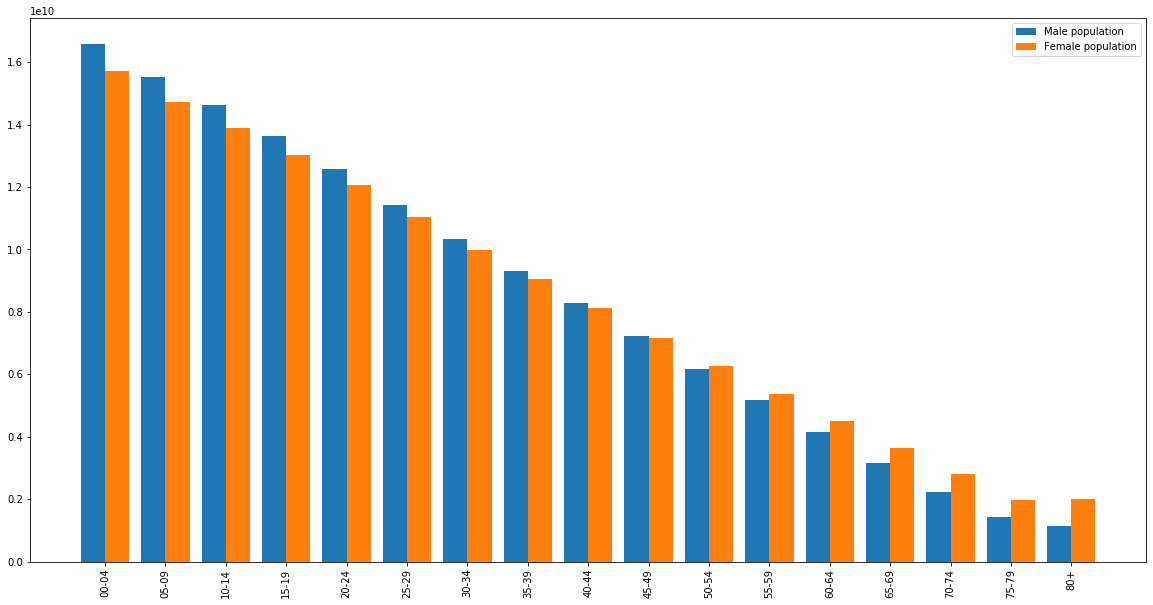

In [23]:
plt.figure(figsize = (20,10))

male_population = ml_pop['value']
female_population = fml_pop['value']
labels = ['00-04', '05-09','10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
           '40-44','45-49','50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']

# first dataset
n = 1  
t = 2 
d = 17
w = 0.8 
bars1_x = [t*element + w*n for element
             in range(d)]
plt.bar(bars1_x, male_population, label = 'Male population')


# Second dataset
n = 2  
t = 2 
d = 17 
w = 0.8 
bars2_x = [t*element + w*n for element
             in range(d)]

plt.bar(bars2_x, female_population, label = 'Female population')

middle_x = [ (a + b) / 2.0 for a, b in zip(bars1_x, bars2_x)]
plt.xticks(middle_x, labels, rotation = 90)
plt.legend()
plt.show()

This bar graph represents the comparison between male and female population based on the age range. In the segment of age more than 50, the female population is higher than male. 

#### Percentage of population age

In [24]:
world = df[df['Country Name']== 'World']
world

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
13809,World,WLD,Age dependency ratio (% of working-age populat...,SP.POP.DPND,7.358939e+01,7.430902e+01,7.513252e+01,7.589669e+01,7.637869e+01,7.650348e+01,...,5.575843e+01,5.524079e+01,5.476767e+01,5.437327e+01,5.407173e+01,5.392305e+01,5.383897e+01,5.381668e+01,5.384501e+01,5.390338e+01
13810,World,WLD,"Age dependency ratio, old",SP.POP.DPND.OL,8.610807e+00,8.724925e+00,8.806098e+00,8.854269e+00,8.876658e+00,8.873045e+00,...,1.132622e+01,1.138447e+01,1.144269e+01,1.151698e+01,1.161860e+01,1.176464e+01,1.192434e+01,1.211810e+01,1.233840e+01,1.259775e+01
13811,World,WLD,"Age dependency ratio, young",SP.POP.DPND.YG,6.412086e+01,6.468396e+01,6.535699e+01,6.598888e+01,6.637663e+01,6.646484e+01,...,4.278193e+01,4.216266e+01,4.159948e+01,4.111861e+01,4.072569e+01,4.044438e+01,4.023444e+01,4.006785e+01,3.993292e+01,3.979393e+01
13900,World,WLD,Female population 00-04,SP.POP.0004.FE,2.109978e+08,2.115441e+08,2.151383e+08,2.210350e+08,2.272200e+08,2.329614e+08,...,3.018916e+08,3.043660e+08,3.062321e+08,3.080710e+08,3.104237e+08,3.133102e+08,3.161211e+08,3.189507e+08,3.214529e+08,3.235410e+08
13901,World,WLD,Female population 05-09,SP.POP.0509.FE,1.864112e+08,1.905472e+08,1.937357e+08,1.960453e+08,1.974704e+08,1.992186e+08,...,2.873024e+08,2.880463e+08,2.897366e+08,2.919420e+08,2.940181e+08,2.964630e+08,2.990604e+08,3.017971e+08,3.045120e+08,3.072145e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14067,World,WLD,"Population, total",SP.POP.TOTL,3.035056e+09,3.076121e+09,3.129064e+09,3.193947e+09,3.259355e+09,3.326054e+09,...,6.594722e+09,6.675833e+09,6.758303e+09,6.840956e+09,6.923684e+09,7.006908e+09,7.089452e+09,7.176092e+09,7.260780e+09,7.346633e+09
14102,World,WLD,Rural population,SP.RUR.TOTL,2.008858e+09,2.020060e+09,2.040820e+09,2.070607e+09,2.100061e+09,2.135535e+09,...,3.318740e+09,3.326498e+09,3.333704e+09,3.340563e+09,3.346928e+09,3.353008e+09,3.358735e+09,3.365564e+09,3.371848e+09,3.378269e+09
14103,World,WLD,Rural population (% of total population),SP.RUR.TOTL.ZS,6.644165e+01,6.592609e+01,6.548163e+01,6.509144e+01,6.469597e+01,6.447247e+01,...,5.051239e+01,5.001385e+01,4.950902e+01,4.900998e+01,4.851505e+01,4.802425e+01,4.754483e+01,4.706491e+01,4.660117e+01,4.614276e+01
14135,World,WLD,Urban population,SP.URB.TOTL,1.014634e+09,1.044069e+09,1.075810e+09,1.110467e+09,1.145985e+09,1.176786e+09,...,3.251411e+09,3.324655e+09,3.399824e+09,3.475523e+09,3.551813e+09,3.628898e+09,3.705618e+09,3.785335e+09,3.863696e+09,3.943073e+09


In [25]:
world_pop = world[world['Indicator Name'].isin(['Population ages 00-14 (% of total)', 'Population ages 15-64 (% of total)', 'Population ages 65 and above (% of total)'])]

In [26]:
world_pop1 = world_pop.melt(id_vars = 'Indicator Name', value_vars = world_pop.loc[:, '1960':'2015'], 
                            var_name = 'Year', value_name = 'Population percentage')

In [27]:
fig = px.pie(world_pop1, names = 'Indicator Name', values = 'Population percentage', 
             color_discrete_sequence=['lightcyan','cyan','royalblue'], title = 'World population ratio, by ages, 1960-2015')
fig.show()

The global population breakdown by age shows that a third (33%) are younger than 14 years, 6.24% are older than 65, while half of the world population is the working age bracket between 15 and 65.

### Age dependency ratio

The age dependency ratio expresses the relationship between three age groups within a population: ages 0-15, 16-64 and 65-plus. ... The old-age dependency ratio is the population ages 65-plus divided by the population ages 16-64. The total age dependency ratio is the sum of the youth and old-age ratios.

#### Global age dependency ratio

In [28]:
#df2

In [29]:
age_dep = groupby_world.loc['Age dependency ratio (% of working-age population)': 'Age dependency ratio, young', :]

In [30]:
age_dep

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Indicator Name,,,,,,,,,,,,,,,,,,,,,
Age dependency ratio (% of working-age population),73.589393,74.309025,75.132524,75.896695,76.378690,76.503484,77.020957,77.095838,76.890522,76.593916,...,55.758427,55.240787,54.767668,54.373274,54.071734,53.923046,53.838965,53.816684,53.845012,53.903376
"Age dependency ratio, old",8.610807,8.724925,8.806098,8.854269,8.876658,8.873045,8.988984,9.076848,9.142931,9.197935,...,11.326219,11.384470,11.442686,11.516982,11.618603,11.764641,11.924338,12.118103,12.338401,12.597747
"Age dependency ratio, young",64.120859,64.683965,65.356994,65.988877,66.376632,66.464844,66.811572,66.777884,66.508279,66.161343,...,42.781930,42.162663,41.599476,41.118613,40.725689,40.444376,40.234440,40.067847,39.932924,39.793932


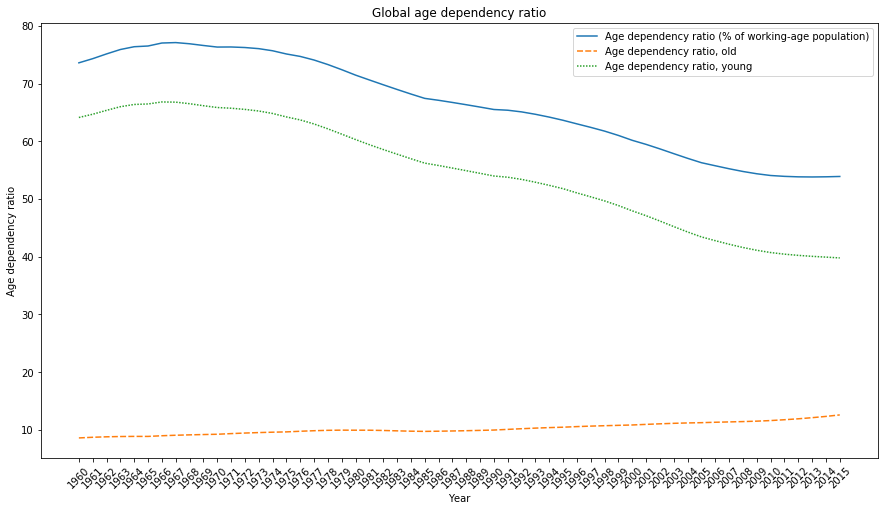

In [59]:
plt.figure(figsize = (15,8))
sns.lineplot(data = age_dep.T)
plt.xticks(rotation = 45)
plt.xlabel('Year')
plt.ylabel('Age dependency ratio')
plt.title('Global age dependency ratio')
plt.show()

- The age dependency of old people has increasing lightly during the whole period while the age of dependency ratio of young one has decreased fro more than 65% to around 40%
- Genenrally, the total age dependency also decreased in recent years

In [32]:
age_dep.T.iplot(kind = 'box')

#### Age dependency ratio in Vietnam

In [33]:
vietnam = df[df['Country Name'] == 'Vietnam'] 

In [34]:
vietnam_age_dep = vietnam.groupby('Indicator Name').sum()[:3]
vietnam_age_dep


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Indicator Name,,,,,,,,,,,,,,,,,,,,,
Age dependency ratio (% of working-age population),81.346212,84.512569,87.649979,90.584901,93.036541,94.854353,96.307285,97.168900,97.458815,97.274888,...,49.280844,47.510918,45.781518,44.344746,43.309778,42.679772,42.319998,42.220303,42.304690,42.511440
"Age dependency ratio, old",8.563223,8.820022,9.053276,9.271850,9.486646,9.701415,9.960636,10.199126,10.397582,10.531871,...,9.814925,9.692381,9.573020,9.465789,9.379943,9.328279,9.302783,9.325307,9.422129,9.605993
"Age dependency ratio, young",72.782989,75.692547,78.596703,81.313051,83.549895,85.152938,86.346648,86.969774,87.061233,86.743017,...,39.465920,37.818537,36.208498,34.878958,33.929835,33.351492,33.017215,32.894996,32.882561,32.905446


In [35]:
a = vietnam_age_dep.T
#a.reset_index(inplace = True)
a.index = pd.to_datetime(a.index)
b = a.resample('5Y').mean()
b

Indicator Name,Age dependency ratio (% of working-age population),"Age dependency ratio, old","Age dependency ratio, young"
1960-12-31,81.346212,8.563223,72.782989
1965-12-31,90.127668,9.266642,80.861027
1970-12-31,96.985306,10.337031,86.648275
1975-12-31,93.470647,9.951296,83.519351
1980-12-31,87.886879,9.742796,78.144083
1985-12-31,82.503800,9.915612,72.588188
1990-12-31,77.653801,10.013086,67.640714
1995-12-31,73.145150,10.102464,63.042686
2000-12-31,65.627492,10.314075,55.313417
2005-12-31,54.941343,10.158835,44.782507


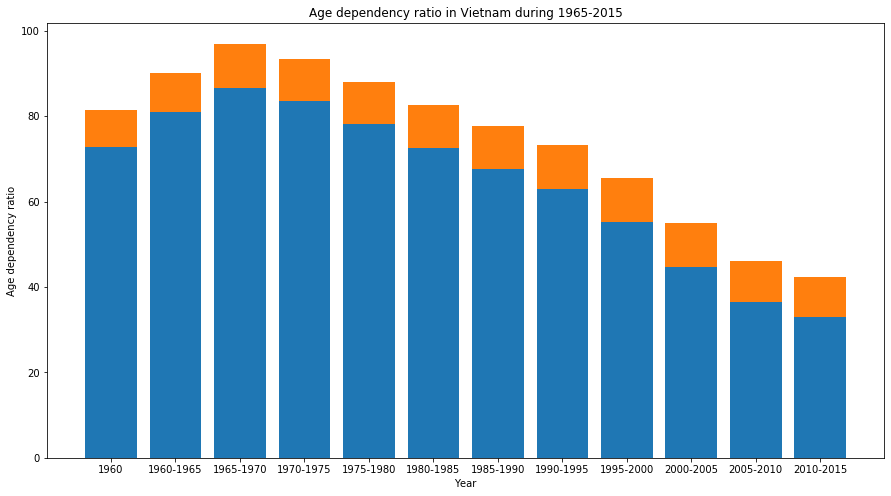

In [36]:
plt.figure(figsize = (15,8))
x_values = ['1960','1960-1965', '1965-1970', '1970-1975', '1975-1980', '1980-1985', '1985-1990', '1990-1995', '1995-2000', '2000-2005', '2005-2010', '2010-2015']
plt.bar(x_values, b['Age dependency ratio, young'])
plt.bar(x_values, b['Age dependency ratio, old'], bottom = b['Age dependency ratio, young'] )
plt.title('Age dependency ratio in Vietnam during 1965-2015')
plt.xlabel('Year')
plt.ylabel('Age dependency ratio')
plt.show()

In Vietnam, the highest age dependency ratio dropped in 1965-1970, the total is more than 95%. However, in the recent years, the number has declined remarkably (under 50% during 2010-2015)

### Population growth

Population growth is the increase in the number of individuals in a population, according to Widipedia. [Link](https://en.wikipedia.org/wiki/Population_growth)

In [37]:
pop_growth = df.groupby(['Country Name', 'Indicator Name']).mean()
pop_growth.reset_index(inplace = True)
pop_growth

,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,Age dependency ratio (% of working-age populat...,81.717726,82.755896,83.304557,83.550740,83.734442,83.962152,85.099266,86.103697,...,9.957427e+01,1.000004e+02,1.002159e+02,1.000605e+02,9.945984e+01,9.766791e+01,9.531271e+01,9.260279e+01,8.977378e+01,8.695446e+01
1,Afghanistan,"Age dependency ratio, old",5.086254,5.132610,5.139519,5.111892,5.056177,4.976298,5.024423,5.046191,...,4.384662e+00,4.426580e+00,4.462181e+00,4.498235e+00,4.538209e+00,4.565499e+00,4.591433e+00,4.611708e+00,4.620393e+00,4.616073e+00
2,Afghanistan,"Age dependency ratio, young",76.631472,77.623286,78.165038,78.438848,78.678265,78.985854,80.074843,81.057506,...,9.518961e+01,9.557379e+01,9.575370e+01,9.556224e+01,9.492163e+01,9.310241e+01,9.072127e+01,8.799108e+01,8.515338e+01,8.233839e+01
3,Afghanistan,"Age population, age 0, female, interpolated",178556.000000,182674.000000,185434.000000,187513.000000,189945.000000,193553.000000,197672.000000,202860.000000,...,4.892590e+05,4.968650e+05,5.022390e+05,5.051230e+05,5.053810e+05,4.985850e+05,4.894100e+05,4.798710e+05,4.728710e+05,4.705540e+05
4,Afghanistan,"Age population, age 0, male, interpolated",177635.000000,181588.000000,185852.000000,190462.000000,195498.000000,201014.000000,205918.000000,211276.000000,...,5.184740e+05,5.236730e+05,5.258610e+05,5.264130e+05,5.262530e+05,5.193600e+05,5.118780e+05,5.049100e+05,5.001340e+05,4.988440e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32388,Zimbabwe,Rural population (% of total population),87.392000,87.179000,86.918000,86.422000,85.908000,85.380000,84.835000,84.273000,...,6.607400e+01,6.625700e+01,6.644000e+01,6.662200e+01,6.680400e+01,6.698500e+01,6.716600e+01,6.734600e+01,6.749900e+01,6.762400e+01
32389,Zimbabwe,Rural population growth (annual %),2.978175,3.013487,2.989215,2.730851,2.699497,2.660642,2.611991,2.572260,...,1.378151e+00,1.562136e+00,1.751320e+00,1.930941e+00,2.099185e+00,2.266390e+00,2.420375e+00,2.525497e+00,2.534382e+00,2.498968e+00
32390,Zimbabwe,Urban population,473101.000000,497024.000000,524099.000000,562238.000000,603076.000000,646516.000000,692786.000000,742096.000000,...,4.453786e+06,4.487076e+06,4.529077e+06,4.579794e+06,4.638775e+06,4.706484e+06,4.782430e+06,4.864823e+06,4.955055e+06,5.051547e+06
32391,Zimbabwe,Urban population (% of total),12.608000,12.821000,13.082000,13.578000,14.092000,14.620000,15.165000,15.727000,...,3.392600e+01,3.374300e+01,3.356000e+01,3.337800e+01,3.319600e+01,3.301500e+01,3.283400e+01,3.265400e+01,3.250100e+01,3.237600e+01


In [38]:
a =pop_growth[pop_growth['Indicator Name'] == 'Population growth (annual %)']
a.set_index('Country Name', inplace = True)
a = a.iloc[:, 1:]
print(a.mean(axis = 1).sort_values(ascending = False).head(5)) #check the top highest population growth countries
print(a.mean(axis = 1).sort_values(ascending = False).tail(5)) #check the top lowest population growth countries

Country Name
United Arab Emirates    8.308723
Qatar                   7.011832
Djibouti                4.306406
Jordan                  3.925982
Bahrain                 3.879373
dtype: float64
Country Name
Ukraine      0.125517
Lithuania    0.110344
Georgia      0.049210
Hungary     -0.020310
Latvia      -0.111907
dtype: float64


In [39]:
top_five = pop_growth[(pop_growth['Indicator Name'] == 'Population growth (annual %)') & pop_growth['Country Name'].isin(['United Arab Emirates', 'Qatar', 'Djibouti', 'Jordan', 'Bahrain'])]
top_five.set_index('Country Name', inplace = True)
last_five = pop_growth[(pop_growth['Indicator Name'] == 'Population growth (annual %)') & pop_growth['Country Name'].isin(['Ukraine', 'Lithuania', 'Hungary', 'Georgia', 'Latvia'])]
last_five.set_index('Country Name', inplace = True)

In [40]:
top_five = top_five.loc[:, '1960': '2015']
last_five = last_five.loc[:, '1960': '2015']

In [41]:
# print(top_five)
# print(last_five)

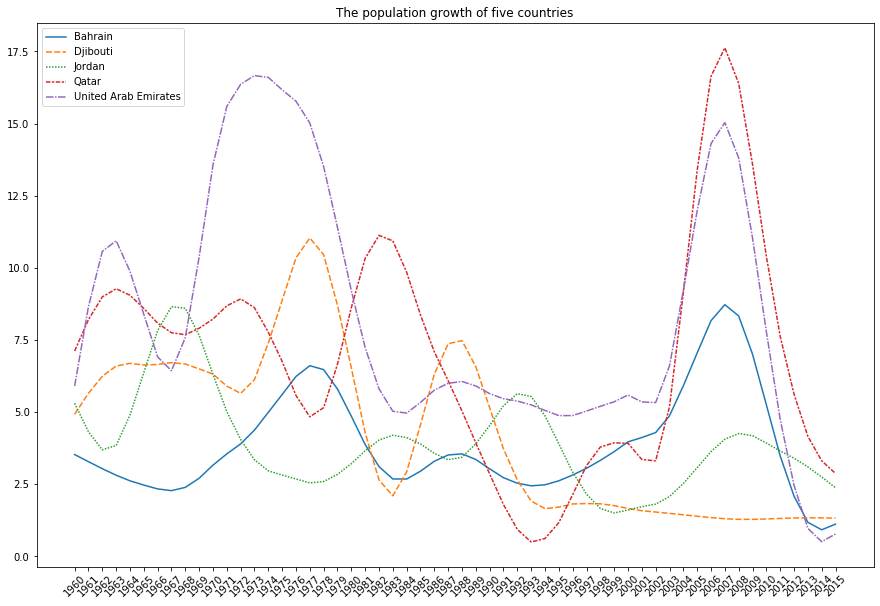

In [42]:
plt.figure(figsize = (15,10))
sns.lineplot(data = top_five.T)
plt.title('The population growth of five countries')
plt.xticks(rotation = 45)
plt.show()

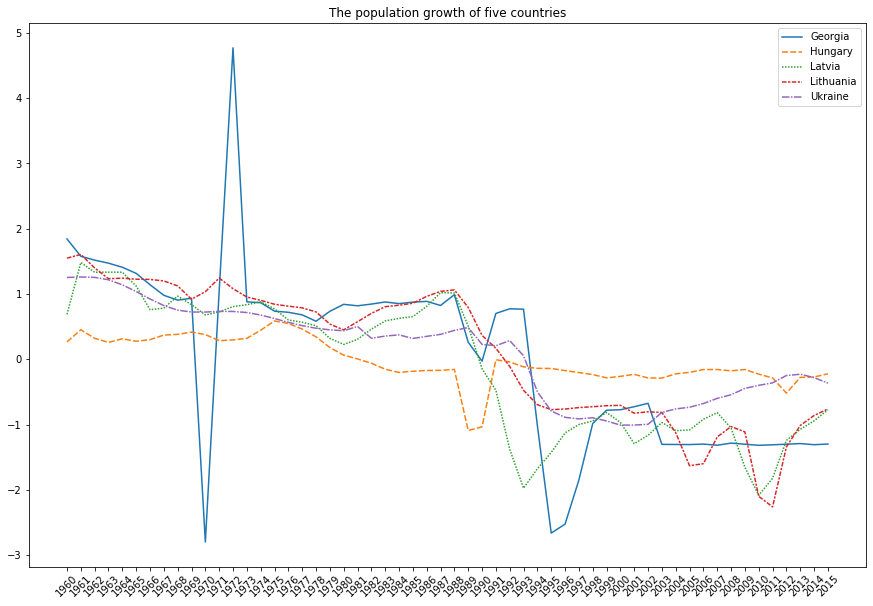

In [43]:
plt.figure(figsize = (15,10))
sns.lineplot(data = last_five.T)
plt.title('The population growth of five countries')
plt.xticks(rotation = 45)
plt.show()

### Rural and urban population

In [44]:
pop_ru = pop_growth.loc[(pop_growth['Indicator Name'] == 'Rural population (% of total population)')| (pop_growth['Indicator Name'] == 'Urban population (% of total)')]
#pop_ru


In [45]:
rural_urban = pop_ru[pop_ru['Country Name'].isin(['East Asia & Pacific', 'Europe & Central Asia', 
                                                  'Central Europe and the Baltics', 'Latin America & Caribbean', 
                                                  'Middle East & North Africa', 'North America','South Asia', 'Sub-Saharan Africa' ])]
rural_urban = rural_urban.melt(id_vars = ['Country Name', 'Indicator Name'], var_name = 'Year', value_name = '% distribution')

In [66]:
fig = px.bar(rural_urban, x = 'Year', y = '% distribution', color= 'Indicator Name', 
             facet_col = 'Country Name', facet_col_wrap = 2, title="Rural and urban population by areas", 
             width = 1200, height = 1200, color_discrete_sequence = ['blue', 'lightcoral'])
fig.update_layout()
fig.show()

Asia and Africa has the higher rural population than other areas, especially in Sub-Saharan Africa, while in Europe and America, the number of rural population is always in low ratio. In general, the number of urban population is increaing in all of the areas. 

### Mortality rate

#### Global mortality rate

In [47]:
mortality_rate = pop_growth.loc[(pop_growth['Indicator Name'] == 'Mortality rate, infant (per 1,000 live births)')|
                                (pop_growth['Indicator Name']== 'Mortality rate, under-5 (per 1,000)')]

In [48]:
mortal_rate = mortality_rate[mortality_rate['Country Name'] == 'World']
mortal_rate1 = mortal_rate.melt(id_vars = 'Indicator Name', value_vars = mortal_rate.loc[:, '1960':'2015'],
                                var_name = 'Year', value_name = 'Mortality rate (per 1000)')
mortal_rate1

,Indicator Name,Year,Mortality rate (per 1000)
0,"Mortality rate, infant (per 1,000 live births)",1960,121.9
1,"Mortality rate, under-5 (per 1,000)",1960,182.7
2,"Mortality rate, infant (per 1,000 live births)",1961,120.4
3,"Mortality rate, under-5 (per 1,000)",1961,180.4
4,"Mortality rate, infant (per 1,000 live births)",1962,118.4
...,...,...,...
107,"Mortality rate, under-5 (per 1,000)",2013,45.6
108,"Mortality rate, infant (per 1,000 live births)",2014,32.6
109,"Mortality rate, under-5 (per 1,000)",2014,43.9
110,"Mortality rate, infant (per 1,000 live births)",2015,31.7


In [49]:
fig = px.line(mortal_rate1, x="Year", y="Mortality rate (per 1000)", color='Indicator Name',
              title = 'The world mortality rate of infant and under five' )
fig.show()

During 55 years from 1960-2015, the mortality rate of infant and under 5 years old have significantly declining. The mortality rate of infant decreased from more than 180 to almost 50 (per 1000 live births) while the mortality rate of children before reaching 5 also decreased from almost 120 to lower than 50 (per 1000 live births).

#### Mortality rate by region

In [50]:
mortal_rate = mortality_rate[mortality_rate['Country Name'].isin(['East Asia & Pacific', 'Europe & Central Asia', 
                                                  'Central Europe and the Baltics', 'Latin America & Caribbean', 
                                                  'Middle East & North Africa', 'North America','South Asia', 'Sub-Saharan Africa'])]

In [65]:
mortal_rate

,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
15977,Latin America & Caribbean,"Mortality rate, infant (per 1,000 live births)",120.531796,117.501291,114.635478,105.495001,103.030791,100.367339,98.052078,95.777789,...,19.869697,19.124833,18.472552,17.869012,17.944076,16.774844,16.312728,15.915800,15.557316,15.221667
15978,Latin America & Caribbean,"Mortality rate, under-5 (per 1,000)",168.912622,164.323495,160.016843,147.279136,143.617199,139.589832,136.101289,132.713413,...,23.660048,22.757849,21.926827,21.177119,23.664594,19.866856,19.301054,18.779051,18.352882,17.964144
21840,North America,"Mortality rate, infant (per 1,000 live births)",26.084210,25.555884,25.007387,24.468249,23.819411,23.280730,22.642701,21.924277,...,6.582571,6.480288,6.377815,6.283620,6.181439,5.979612,5.978237,5.786136,5.585846,5.486030
21841,North America,"Mortality rate, under-5 (per 1,000)",30.342381,29.704598,29.056199,28.407249,27.748527,27.100000,26.361801,25.633742,...,7.751256,7.648365,7.545232,7.350368,7.247565,7.045216,6.943448,6.751101,6.550722,6.359729
26507,South Asia,"Mortality rate, infant (per 1,000 live births)",168.000000,166.300000,163.300000,160.300000,157.600000,155.100000,152.600000,150.300000,...,56.500000,54.800000,53.100000,51.500000,49.800000,48.100000,46.500000,44.800000,43.300000,41.900000
26508,South Asia,"Mortality rate, under-5 (per 1,000)",249.800000,247.100000,242.500000,238.200000,234.100000,230.300000,226.600000,223.100000,...,74.400000,71.700000,69.100000,66.500000,64.000000,61.600000,59.100000,56.800000,54.600000,52.500000


In [64]:
fig = px.scatter(mortal_rate, x="Country Name", y= mortal_rate.columns[2:]
                 ,color = "Indicator Name" , title = 'Mortalily rates, by years, 1960-1970') # could not choose all the columns here
fig.update_layout(yaxis_title = 'Mortality rate', xaxis_title = 'Areas')
fig.show()

It is clearly seen that South Asia has a high mortality rate in comparison to North America or Latin America and Caribbean. #use the categorized plot

In [56]:
fig = px.scatter(mortal_rate, x="Country Name", y= ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
                 ,color = "Indicator Name" , title = 'Mortalily rates, by years, 2005-2015') # could not choose all the columns here
fig.update_layout(yaxis_title = 'Mortality rate', xaxis_title = 'Areas')
fig.show()

In [63]:
mortal_rate.columns[2:]

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015'],
      dtype='object')

## Summary

To sum up, with the data from Global Health Nutrition, I have a big overview about the world population and the changing in the age dependency ratio, male and female population, etc. Due to the development of economics and medical system, the global population health has significantly improvement. 